In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


13.0


ValueError: unknown file extension: .html

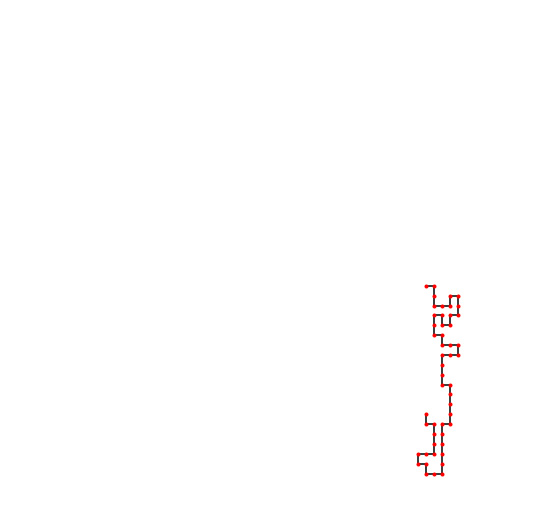

In [2]:
np.random.seed(69)
L = 50
N=10
iterations=1000
poly = []
for i in range(0, L):
    poly.append([i+L/2, L/2])

    
def randomwalk(x,y):
    adjacents = np.array([np.array([ 0,  1]), np.array([ 1,  0]), np.array([-1,  0]), np.array([ 0, -1])])
    choice = np.random.randint(0,4)
    x += adjacents[choice][0]
    y += adjacents[choice][1]
    return x,y


fig = plt.figure(figsize=(9,9))

im = []
distances = []
count = 0
for i in range(iterations):
    hx, hy = poly[-1]
    tx, ty = poly[0]
    hx,hy = randomwalk(hx,hy)
    if [hx, hy] not in poly:
        #if randomwalk(hx,hy) in poly:
        if (([hx+1, hy] in poly) and ([hx-1, hy] in poly) and ([hx, hy+1] in poly) and ([hx, hy+1] in poly)):
            poly.reverse()
        else:
            poly.append([hx, hy])
            poly.remove(poly[0])
            count += 1
    head = np.array(poly[-1])
    tail = np.array(poly[0])
    diff = head-tail
    distances.append(np.sqrt(np.sum(diff**2)))


    var, = plt.plot(np.array(poly)[:, 0], np.array(poly)[:,1], 'k-', 
                    marker = '.' , mec = 'red', mfc = 'red',
                    animated = True)
    im.append([var])
#plt.xlim(25,75)
#plt.ylim(0,50)

plt.axis('off')
print(distances[-1])
polymer = anim.ArtistAnimation(fig, im, interval = 50, blit = True)
polymer.save("polymer_animation.html")


In [31]:
D = np.log(L)/np.log(distances[-1])
print('fractal dimension = ', D)

fractal dimension =  1.5251852805779265
